In [66]:
%matplotlib inline
import os, re
import numpy as np
import matplotlib.pyplot as plt
from glob import glob

systems = glob('../exp/transfer/analyses/const/constmd/*')

rho = 1.0753e3
NA = 6.022e23
MW = (60.052 + 82.10) * 1e-3
q = 1.602176634e-19
T = 340
kB = 1.380649e-23
ne_fac = rho / MW * q**2 / (kB * T) * NA * 10 * 1e-10
gk_fac = rho / MW * q**2 / (kB * T) * NA * 10 / 32 * 1e-10
d = lambda msd, idx: msd[2300, idx]/msd[2300, 0]/6*100

sigma = {
    340: [[] for i in range(6)],
    380: [[] for i in range(6)],
    450: [[] for i in range(6)]
}

for sys in sorted(systems):
    name = os.path.basename(sys)
    d_all = []
    if not os.path.exists(f'../skel/restart/{name}.xyz'):
        continue
    try:
        msd = np.load(f"{sys}/msd-0-5ns/msd.npy")
        pmsd = np.load(f"{sys}/msd-0-5ns/pmsd.npy")
    except:
        continue
        
    d_all.append([d(msd,1), d(msd,2), d(msd,3), d(pmsd, 1)])
    d_avg = np.mean(d_all, axis=0)
    d_std = np.std(d_all, axis=0)
    
    
    # print(f'System: {name}, '
    #       f'H: {d_avg[0]:.2f}({d_std[0]:.2f}), '
    #       f'O: {d_avg[1]:.2f}({d_std[1]:.2f}), '
    #       f'N: {d_avg[2]:.2f}({d_std[2]:.2f}), ' 
    #       f'GK: {d_avg[3]*gk_fac:.2f} '
    #       f'Delta: {1-d_avg[3]*gk_fac/((d_avg[1]+d_avg[2])*ne_fac):.3f}'
    #      )
    
    frac = float(re.search('\d+k-\d-(.*)', name).group(1))
    temp = int(re.search('(\d+)k-\d-.*', name).group(1))
    if temp in sigma:
        sigma[temp][0].append(frac)
        sigma[temp][1].append(1-d_avg[3]*gk_fac/((d_avg[1]+d_avg[2])*ne_fac))
        sigma[temp][2].append(d_avg[3]*gk_fac)
        sigma[temp][3].append(d_avg[0])
        sigma[temp][4].append(d_avg[1])
        sigma[temp][5].append(d_avg[2])

In [68]:
for k,v in sigma.items():
    print(f'temperature {k}, '
          f'H {np.mean(v[3]):.2f}({np.std(v[3]):.2f}), '
          f'O {np.mean(v[4]):.2f}({np.std(v[4]):.2f}), '
          f'N {np.mean(v[5]):.2f}({np.std(v[5]):.2f}), '
          f'GK {np.mean(v[2]):.2f}({np.std(v[2]):.2f}), '
          f'Dleta {np.mean(v[1]):.2f}({np.std(v[1]):.2f})')

temperature 340, H 0.10(0.04), O 0.12(0.04), N 0.12(0.06), GK 0.70(0.38), Dleta 0.87(0.06)
temperature 380, H 0.43(0.12), O 0.46(0.12), N 0.48(0.14), GK 1.97(1.32), Dleta 0.91(0.06)
temperature 450, H 1.79(0.33), O 1.90(0.34), N 1.95(0.23), GK 14.34(13.56), Dleta 0.85(0.16)


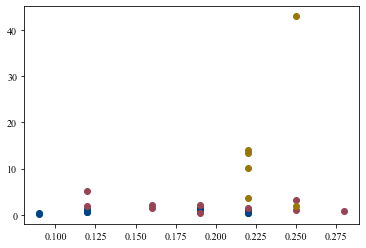

In [69]:
plt.scatter(sigma[340][0], sigma[340][2])
plt.scatter(sigma[380][0], sigma[380][2])
plt.scatter(sigma[450][0], sigma[450][2])
